In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def calculate_overlap(features, pasef_scheme):
    
    overlapping_features = []
    features_mass_window = []
    features_mass_window_IM = []

    # frame index = MS1 scan index
    frames = range(min(features['Min frame index']), max(features['Max frame index'])+1)

    # Calculate ion mobility peak boundaries
    features['IM index begin'] = features['Ion mobility index'] - 0.5 * features['Ion mobility index length (FWHM)']
    features['IM index end'] = features['Ion mobility index'] + 0.5 * features['Ion mobility index length (FWHM)']

    for frame in frames:
        # loop through all MS1 scans
        
        features_frame = features.loc[(features['Min frame index'] <= frame) & (features['Max frame index'] >= frame)]
        
        # Total number of features detected in this scan
        overlapping_features.append(len(features_frame))

        for mz_min, mz_max in zip(pasef_scheme[' Start Mass [m/z] '], pasef_scheme[' End Mass [m/z] ']):
            # loop through each dia-PASEF m/z window as defined in the acquisition scheme 
            
            features_window = features_frame.loc[(features_frame['m/z'] >= mz_min) & (features_frame['m/z'] <= mz_max)]

            if(len(features_window) > 0):
                # discard empty scans
                
                features_mass_window.append(len(features_window))

                begin = features_window['IM index begin']
                end = features_window['IM index end']

                diff = begin[None, :] - end[:, None]

                # calculate average number of features per dia-PASEF window that are 
                # 1) within the same m/z window and 
                # 2) have overlapping ion mobility peak boundaries
                
                features_mass_window_IM.append(np.sum((diff < 0) * (diff.T < 0)) *1 / len(diff))  
    
    return overlapping_features, features_mass_window, features_mass_window_IM

In [5]:
# read dia-PASEF acquisition scheme from method file

file_pasef = 'evidences/diaPASEF_method.txt'
pasef_scheme = pd.read_csv(file_pasef)
pasef_scheme

,MS Type,Cycle Id,Start IM [1/k0],End IM [1/k0],Start Mass [m/z],End Mass [m/z],CE [eV]
0,PASEF,1,0.92,1.50,847.29,872.84,-
1,PASEF,1,0.60,0.92,400.19,505.55,-
2,PASEF,2,0.95,1.50,872.84,898.63,-
3,PASEF,2,0.60,0.95,505.55,563.22,-
4,PASEF,3,0.97,1.50,898.63,924.44,-
5,PASEF,3,0.60,0.97,563.22,605.25,-
6,PASEF,4,0.99,1.50,924.44,950.77,-
7,PASEF,4,0.60,0.99,605.25,638.75,-
8,PASEF,5,1.01,1.50,950.77,977.90,-
9,PASEF,5,0.60,1.01,638.75,669.78,-


In [4]:
# Load MaxQuant features (allPeptides.txt file)
features_07min = pd.read_csv('evidences/allPeptides_07min.txt', sep = '\t')
features_21min = pd.read_csv('evidences/allPeptides_21min.txt', sep = '\t')
features_60min = pd.read_csv('evidences/allPeptides_60min.txt', sep = '\t')

features_21min.head()

,Raw file,Charge,m/z,Mass,Number of data points,Number of frames,Number of isotopic peaks,Isotope correlation,Mass fractional part,Mass deficit,...,Min frame index,Max frame index,Ion mobility index,Ion mobility index length,Ion mobility index length (FWHM),Intensity,Intensities,Number of pasef MS/MS,Pasef MS/MS IDs,MS/MS scan number
0,20220302_tims1_nElute_8cm_DOl_Phospho_21min_re...,2,349.22643,696.43830,20,2,2,0.989717,0.438303,0.077941,...,273,274,60,6,6,606.87,NaN,0,NaN,NaN
1,20220302_tims1_nElute_8cm_DOl_Phospho_21min_re...,3,367.84932,1100.52610,111,5,3,0.954755,0.526118,-0.020124,...,146,150,60,15,15,1620.10,NaN,0,NaN,NaN
2,20220302_tims1_nElute_8cm_DOl_Phospho_21min_re...,4,394.15701,1572.59890,45,3,2,0.922053,0.598946,-0.164449,...,186,188,60,18,9,983.64,NaN,0,NaN,NaN
3,20220302_tims1_nElute_8cm_DOl_Phospho_21min_re...,2,397.21285,792.41114,28,2,2,0.971458,0.411139,0.006630,...,273,274,63,9,9,865.90,NaN,0,NaN,NaN
4,20220302_tims1_nElute_8cm_DOl_Phospho_21min_re...,3,403.82992,1208.46790,17352,15,6,0.973853,0.467928,-0.127967,...,371,385,66,423,93,331120.00,NaN,0,NaN,NaN


In [9]:
overlapping_features_07min, features_mass_window_07min, features_mass_window_IM_07min = calculate_overlap(features_07min, pasef_scheme)

np.median(features_mass_window_07min), np.median(features_mass_window_IM_07min)

(36.0, 7.256410256410256)

In [10]:
overlapping_features_21min, features_mass_window_21min, features_mass_window_IM_21min = calculate_overlap(features_21min, pasef_scheme)

np.median(features_mass_window_21min), np.median(features_mass_window_IM_21min)

(33.0, 6.485714285714286)

In [11]:
overlapping_features_60min, features_mass_window_60min, features_mass_window_IM_60min = calculate_overlap(features_60min, pasef_scheme)

np.median(features_mass_window_60min), np.median(features_mass_window_IM_60min)

(19.0, 4.222222222222222)

## Plotting

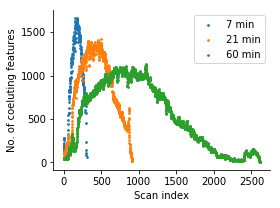

In [13]:
# Number of coeluting features

fig = plt.figure(figsize=(4,3))
ax = plt.axes()

plt.scatter(range(0, len(overlapping_features_07min)), overlapping_features_07min, s = 3, alpha = 1, label = '7 min')
plt.scatter(range(0, len(overlapping_features_21min)), overlapping_features_21min, s = 3, alpha = 1, label = '21 min')
plt.scatter(range(0, len(overlapping_features_60min)), overlapping_features_60min, s = 3, alpha = 1, label = '60 min')


plt.xlabel('Scan index')
plt.ylabel('No. of coeluting features')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend()

plt.tight_layout()
plt.savefig("Figures/Features_overlap.pdf");
plt.show()

C:\Users\fmeier\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


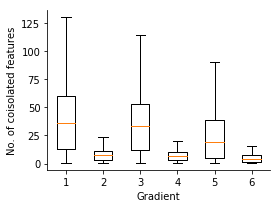

In [14]:
# Number of coisolated features, no IM vs. IM
# to do: prettier plot -> use seaborn?

plot_data = [features_mass_window_07min, 
             features_mass_window_IM_07min, 
             features_mass_window_21min,
             features_mass_window_IM_21min,
             features_mass_window_60min,
             features_mass_window_IM_60min]

fig = plt.figure(figsize=(4,3))
ax = plt.axes()

plt.boxplot(plot_data, showfliers=False)

plt.xlabel('Gradient')
plt.ylabel('No. of coisolated features')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig("Figures/Features_coisolated.pdf");
plt.show()